In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-14-830c3a369e7a>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [15]:
#from google.colab import files
#uploaded = files.upload()

Saving C.csv to C (1).csv


In [44]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [45]:
import yfinance as yf

In [46]:
data = yf.download(tickers = "C", period = "1y", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [52]:

data.head()




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-09,61.869999,62.500000,60.849998,62.139999,59.738552,29960500
2021-12-10,61.680000,62.259998,60.200001,60.709999,58.363811,39726500
2021-12-13,60.490002,60.869999,59.779999,60.180000,57.854294,20489500
2021-12-14,60.450001,61.320000,60.380001,60.639999,58.296520,19571100
2021-12-15,60.939999,61.009998,59.540001,60.240002,57.911980,33861300


In [41]:
#df.diff(period = 0, axis = 1)

TypeError: ignored

In [43]:
#df.diff('Close', parameter = 1, axis = 1)

TypeError: ignored

In [53]:
data1= data.diff(periods=1)

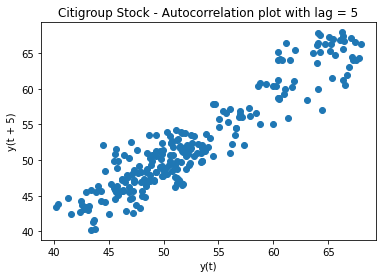

In [54]:
plt.figure()
lag_plot(df['Open'], lag=5)
plt.title('Citigroup Stock - Autocorrelation plot with lag = 5')
plt.show()

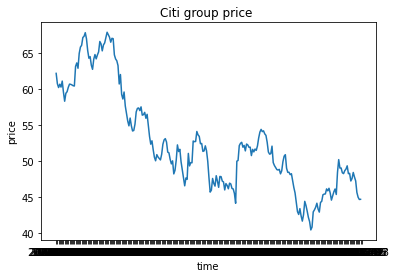

In [55]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,253, 1), df['Date'][0:253:1])
plt.title("Citi group price ")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [20]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 0.9643208351706425


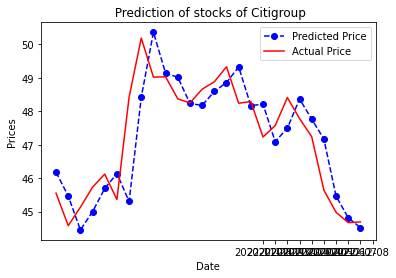

In [56]:
test_set_range = df[int(len(df)*0.9):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title(' Prediction of stocks of Citigroup')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(243,253,1), df.Date[243:253:1])
plt.legend()
plt.show()